In [154]:
source("../R/robust_lasso.R")

R^2 (robust_lasso): -2.16762e+26 
R^2 (glmnet): 0.889024 
[1] "SLA"


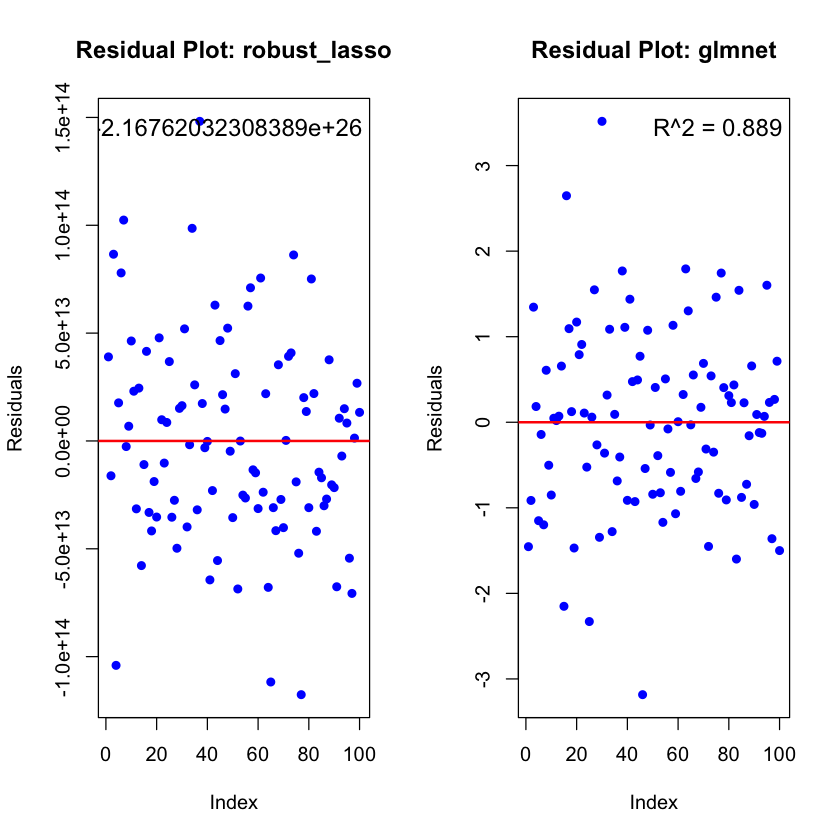

In [150]:
# test the basic implemetation of the function
# use simulated data

# Load required package
if (!requireNamespace("glmnet", quietly = TRUE)) {
  install.packages("glmnet")
}
library(glmnet)

# Simulate data
generate_simulation_data <- function(n, p, sparsity_level = 0.2, noise_sd = 1) {
  # Parameters:
  # n: Number of samples
  # p: Number of features
  # sparsity_level: Proportion of non-zero coefficients
  # noise_sd: Standard deviation of noise
  
  # Generate sparse coefficients
  non_zero_count <- ceiling(sparsity_level * p)
  beta <- c(rnorm(non_zero_count, mean = 1, sd = 0.5), rep(0, p - non_zero_count))
  beta <- sample(beta)  # Shuffle the coefficients
  
  # Generate design matrix (X)
  X <- matrix(rnorm(n * p), nrow = n, ncol = p)
  
  # Generate response variable (y)
  y <- X %*% beta + rnorm(n, mean = 0, sd = noise_sd)
  
  return(list(X = X, y = as.vector(y), beta_true = beta))
}

# Compute R^2
calculate_r_squared <- function(y, y_pred) {
  ss_total <- sum((y - mean(y))^2)  # Total sum of squares
  ss_residual <- sum((y - y_pred)^2)  # Residual sum of squares
  r_squared <- 1 - (ss_residual / ss_total)
  return(r_squared)
}

# Residual Plot
plot_residuals <- function(y, y_pred, r_squared, title) {
  residuals <- y - y_pred
  plot(residuals, main = title,
       xlab = "Index", ylab = "Residuals", col = "blue", pch = 16)
  abline(h = 0, col = "red", lwd = 2)
  legend("topright", legend = paste("R^2 =", round(r_squared, 3)), bty = "n", cex = 1.2)
}

# Example: Test robust_lasso and compare with glmnet
set.seed(123)

# Generate simulation data
simulation_data <- generate_simulation_data(n = 100, p = 20, sparsity_level = 0.3, noise_sd = 1)
X <- simulation_data$X
y <- simulation_data$y
beta_true <- simulation_data$beta_true

# Set lambda
lambda <- 0.1

# Run robust_lasso
result_robust <- robust_lasso(X, y, lambda = lambda, method = "SLA")
beta_robust <- result_robust$fit$beta
y_pred_robust <- cbind(1, X) %*% beta_robust  # Include intercept term

# Run glmnet
fit_glmnet <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
beta_glmnet <- as.vector(coef(fit_glmnet, s = lambda))  # Include intercept term
y_pred_glmnet <- predict(fit_glmnet, X, s = lambda)

# Calculate R^2 for both methods
r_squared_robust <- calculate_r_squared(y, y_pred_robust)
r_squared_glmnet <- calculate_r_squared(y, y_pred_glmnet)

# Print R^2
cat("R^2 (robust_lasso):", r_squared_robust, "\n")
cat("R^2 (glmnet):", r_squared_glmnet, "\n")
print(result_robust$method)

# Visualize residual plots
par(mfrow = c(1, 2))  # Two plots side-by-side
plot_residuals(y, y_pred_robust, r_squared_robust, title = "Residual Plot: robust_lasso")
plot_residuals(y, y_pred_glmnet, r_squared_glmnet, title = "Residual Plot: glmnet")


In [161]:
source("../R/robust_lasso.R")

R^2 (robust_lasso with SLA): 0.6157016 
R^2 (glmnet): 0.9809602 


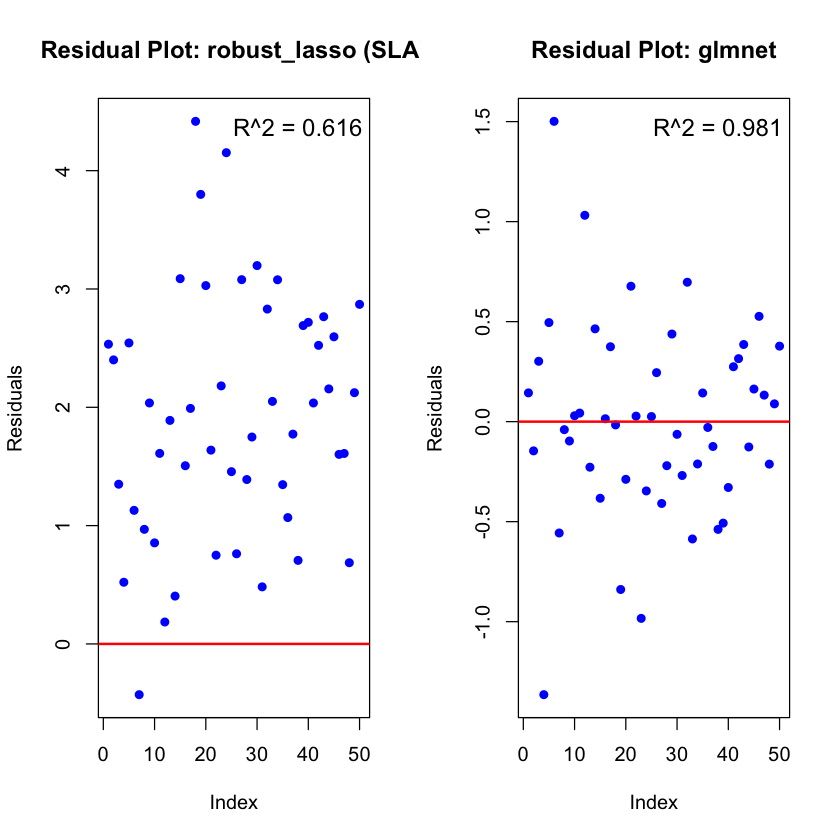

In [175]:
# Load required packages
if (!requireNamespace("glmnet", quietly = TRUE)) {
  install.packages("glmnet")
}
library(glmnet)

# Simulate data for SLA
generate_highdim_sparse_data <- function(n, p, sparsity_level = 0.1, noise_sd = 1) {
  # Parameters:
  # n: Number of samples
  # p: Number of features (p >> n for high-dimensional data)
  # sparsity_level: Proportion of non-zero coefficients
  # noise_sd: Standard deviation of noise
  
  # Generate sparse coefficients
  non_zero_count <- ceiling(sparsity_level * p)
  beta <- c(rnorm(non_zero_count, mean = 1, sd = 0.5), rep(0, p - non_zero_count))
  beta <- sample(beta)  # Shuffle the coefficients
  
  # Generate design matrix (X)
  X <- matrix(rnorm(n * p), nrow = n, ncol = p)
  
  # Generate response variable (y)
  y <- X %*% beta + rnorm(n, mean = 0, sd = noise_sd)
  
  return(list(X = X, y = as.vector(y), beta_true = beta))
}

# Compute R^2
calculate_r_squared <- function(y, y_pred) {
  ss_total <- sum((y - mean(y))^2)  # Total sum of squares
  ss_residual <- sum((y - y_pred)^2)  # Residual sum of squares
  r_squared <- 1 - (ss_residual / ss_total)
  return(r_squared)
}

# Residual Plot
plot_residuals <- function(y, y_pred, r_squared, title) {
  residuals <- y - y_pred
  plot(residuals, main = title,
       xlab = "Index", ylab = "Residuals", col = "blue", pch = 16)
  abline(h = 0, col = "red", lwd = 2)
  legend("topright", legend = paste("R^2 =", round(r_squared, 3)), bty = "n", cex = 1.2)
}

# Example: Test SLA (via robust_lasso) and compare with glmnet
set.seed(123)

# Step 1: Generate high-dimensional sparse data
data <- generate_highdim_sparse_data(n = 50, p = 200, sparsity_level = 0.05, noise_sd = 1)
X <- data$X
y <- data$y
beta_true <- data$beta_true

# Step 2: Set lambda
lambda <- 0.1

# Step 3: Run robust_lasso with SLA
result_robust <- robust_lasso(X, y, lambda = lambda, method = "SLA")
beta_robust <- result_robust$fit$beta
y_pred_robust <- cbind(1, X) %*% beta_robust  # Include intercept term

# Step 4: Run glmnet
fit_glmnet <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
beta_glmnet <- as.vector(coef(fit_glmnet, s = lambda))  # Include intercept term
y_pred_glmnet <- predict(fit_glmnet, X, s = lambda)

# Step 5: Calculate R^2 for both methods
r_squared_robust <- calculate_r_squared(y, y_pred_robust)
r_squared_glmnet <- calculate_r_squared(y, y_pred_glmnet)

# Print R^2
cat("R^2 (robust_lasso with SLA):", r_squared_robust, "\n")
cat("R^2 (glmnet):", r_squared_glmnet, "\n")

# Step 6: Visualize residual plots
par(mfrow = c(1, 2))  # Two plots side-by-side
plot_residuals(y, y_pred_robust, r_squared_robust, title = "Residual Plot: robust_lasso (SLA)")
plot_residuals(y, y_pred_glmnet, r_squared_glmnet, title = "Residual Plot: glmnet")
